In [1]:
# Here we classify each galaxy in my data as either a slow rotator (SR) or fast rotator (FR) using:

# λRe <λRstart + εe/4, with εe < 0.35 + λRstart/1.538 as the criteria, with λRstart = 0.12
# (0.16 in other Jesse paper, 0.08 in Capellari)

import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff,hstack,join
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
from scipy.stats import sem
warnings.filterwarnings("ignore")

data = Table.read('/suphys/fscu5535/python_scripts/mod_data/massGaps6.7.fits',memmap=True)
data.info()

<Table length=552>
            name             dtype   unit     class     n_bad
--------------------------- ------- ------ ------------ -----
                    GroupID   int32        MaskedColumn     0
                  m1_CATAID   int64        MaskedColumn     0
                  m2_CATAID   int64        MaskedColumn     0
                         m1 float32              Column     0
                         m2 float32              Column     0
                      m1-m2 float32              Column     0
              m1_LAMBDAR_RE float64              Column   120
                       Nfof   int16        MaskedColumn     0
                      MassA float32 Msun/h       Column     0
              log(MassA)/m1 float64              Column     0
                    SatMean float32              Column     0
                  SatMedian float32              Column     0
                 m1-SatMean float32              Column     0
               m1-SatMedian float32              Co

In [3]:
# 1 = SR, 0 = FR, -999 = bad data
CATAIDS = []
classification = []
badELLIP = 0
badSPIN = 0
LAMBDA_START = 0.12
ELLIP_CUTOFF = 0.35 + LAMBDA_START/1.538

for i in range(len(data)):
    
    if str(data['ELLIP'][i]) == 'nan':
        badELLIP += 1
        classification.append(-999)
        CATAIDS.append(data['m1_CATAID'][i])
        
    elif str(data['LAMBDAR_RE_SEEING'][i]) == 'nan':
        badSPIN += 1
        classification.append(-999)
        CATAIDS.append(data['m1_CATAID'][i])
    
    elif data['ELLIP'][i] < ELLIP_CUTOFF and data['LAMBDAR_RE_SEEING'][i] < LAMBDA_START + data['ELLIP'][i]/4:
        classification.append(1)
        CATAIDS.append(data['m1_CATAID'][i])   
        
    else:
        classification.append(0)
        CATAIDS.append(data['m1_CATAID'][i])
        
print(len(classification))
print(badELLIP)
print(badSPIN)
print(len(CATAIDS))


SRcount = 0
FRcount = 0
uhoh = 0

for i in range(len(classification)):
    if classification[i] == 1:
        SRcount += 1
    elif classification[i] == 0:
        FRcount += 1
    else:
        uhoh += 1
        
print(SRcount, FRcount, uhoh)

print(len(CATAIDS),len(list(set(CATAIDS))))

classificationTable = Table()
classificationTable['m1_CATAID'] = CATAIDS
classificationTable['ROTATOR_CAT_SEEING'] = classification
classificationTable.info()

552
16
121
552
77 338 137
552 552
<Table length=552>
       name        dtype
------------------ -----
         m1_CATAID int64
ROTATOR_CAT_SEEING int64


In [4]:
# left join this data to existing
data.info()
data = join(data,classificationTable,keys='m1_CATAID',join_type='left')
data.info()

<Table length=552>
            name             dtype   unit     class     n_bad
--------------------------- ------- ------ ------------ -----
                    GroupID   int32        MaskedColumn     0
                  m1_CATAID   int64        MaskedColumn     0
                  m2_CATAID   int64        MaskedColumn     0
                         m1 float32              Column     0
                         m2 float32              Column     0
                      m1-m2 float32              Column     0
              m1_LAMBDAR_RE float64              Column   120
                       Nfof   int16        MaskedColumn     0
                      MassA float32 Msun/h       Column     0
              log(MassA)/m1 float64              Column     0
                    SatMean float32              Column     0
                  SatMedian float32              Column     0
                 m1-SatMean float32              Column     0
               m1-SatMedian float32              Co

In [5]:
# save to file
data.write('/suphys/fscu5535/python_scripts/mod_data/massGaps6.8.fits')

In [6]:
# let's test some random catids
data = Table.read('/suphys/fscu5535/python_scripts/mod_data/massGaps6.8.fits')
print(data[400])

GroupID m1_CATAID m2_CATAID     m1        m2       m1-m2        m1_LAMBDAR_RE    Nfof      MassA        log(MassA)/m1     SatMean  SatMedian  m1-SatMean  m1-SatMedian     log(MassA)     IntermediateMean  m1-IntMean  LAMBDAR_RE_EO E_LAMBDAR_RE_EO   ELLIP    LMSTAR RE_CIRC_KPC ROTATOR_CAT INTRINSIC_ELLIP ROTATOR_CAT_INTRINSIC_ELLIP     Zfof     IterCenRA    IterCenDec  IterCenZ  LAMBDAR_RE_SEEING E_LAMBDAR_RE_SEEING   logage_LW_1Re    logage_MW_1Re     linage_LW_1Re     linage_MW_1Re   ROTATOR_CAT_SEEING
                                                                                           Msun/h                                                                                                                                                                                                                                                           deg          deg                                                                                                                                

In [5]:
# read in sami data
sami1 = Table.read('/suphys/fscu5535/python_scripts/raw_data/InputCatGAMADR3.fits')
sami1.info()

<Table length=5536>
     name      dtype       unit        class     n_bad
------------- ------- ------------- ------------ -----
        CATID   int64                     Column     0
       RA_OBJ float64           deg       Column     0
      DEC_OBJ float64           deg       Column     0
       RA_IFU float64           deg       Column     0
      DEC_IFU float64           deg       Column     0
      r_petro float32           mag       Column     0
       r_auto float32           mag       Column     0
      z_tonry float32                     Column     0
       z_spec float32                     Column     0
          M_r float32           mag MaskedColumn   130
          r_e float32        arcsec MaskedColumn   101
mu_within_1re float32 mag / arcsec2 MaskedColumn   101
       mu_1re float32 mag / arcsec2 MaskedColumn   101
       mu_2re float32 mag / arcsec2 MaskedColumn   110
        ellip float32               MaskedColumn   101
           PA float32           deg MaskedCol

In [14]:
for i in range(len(sami1)):
    if sami1['CATID'][i] == 144498:
        print(sami1['CATID'][i], sami1['ellip'][i])

144498 0.4173


In [17]:
# load jesse data:
jesse = Table.read('/suphys/fscu5535/python_scripts/raw_data/jvds_stelkin_cat_v012_mge_seecorr_kh20_v20220604_private.fits')
jesse.info()
for i in range(len(jesse)):
        if jesse['CATID'][i] == 144498:
            print(jesse['CATID'][i], jesse['ELLIP'][i], jesse['INTRINSIC_ELLIP'][i])
            

<Table length=3430>
      name       dtype     class     n_bad
--------------- ------- ------------ -----
          CATID   int64       Column     0
      CATID_EXT   int64       Column     0
  SAMI_FILENAME bytes69       Column     0
       OBS_DATE bytes21       Column     0
             RA float32       Column     0
            DEC float32       Column     0
         LMSTAR float32       Column     0
         Z_SPEC float32       Column     0
        Z_TONRY float32 MaskedColumn   984
        GMINUSI float32       Column     0
       MU_AT_RE float32 MaskedColumn   984
       GAL_FLAG float32       Column     0
       HWHM_PSF float32       Column     0
             RE float32 MaskedColumn    53
    RE_CIRC_KPC float32 MaskedColumn    53
          ELLIP float32 MaskedColumn    52
       N_SERSIC float32 MaskedColumn   108
          MTYPE float32       Column     0
      KIN_MTYPE float32       Column     0
ENV_DIST_TO_5NN float32 MaskedColumn   130
   ENV_SURFDENS float32 MaskedColu

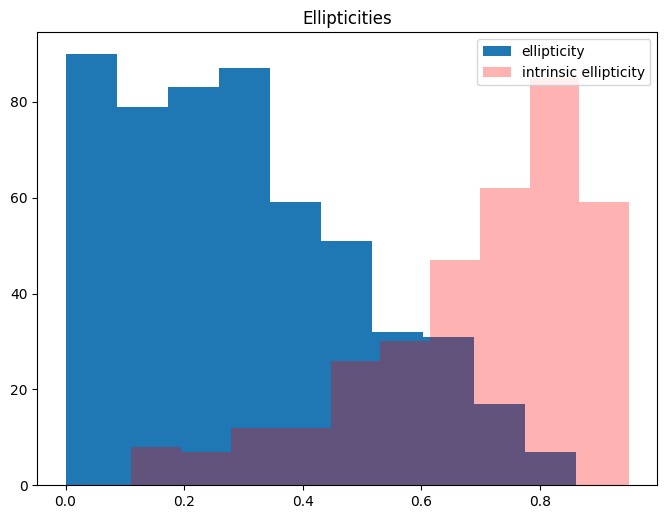

In [30]:
# plot ellip and intrin ellip hists
plt.figure(figsize=(8,6),dpi=100)
elliphist = plt.hist(data['ELLIP'])
intr_elliphist = plt.hist(data['INTRINSIC_ELLIP'],color = 'r', alpha = 0.3)
plt.title("Ellipticities")
plt.legend(['ellipticity','intrinsic ellipticity'])

# save the plot
filename = "/suphys/fscu5535/python_scripts/figures/EllipticityIntrinsicEllipticityhist.png"
plt.savefig(filename, bbox_inches='tight', pad_inches=0.3, dpi = 250)

In [10]:
count = 0

for i in range(len(data)):
    if data['ROTATOR_CAT_SEEING'][i] == -999:
        count += 1
        
print(count, len(data))

137 552


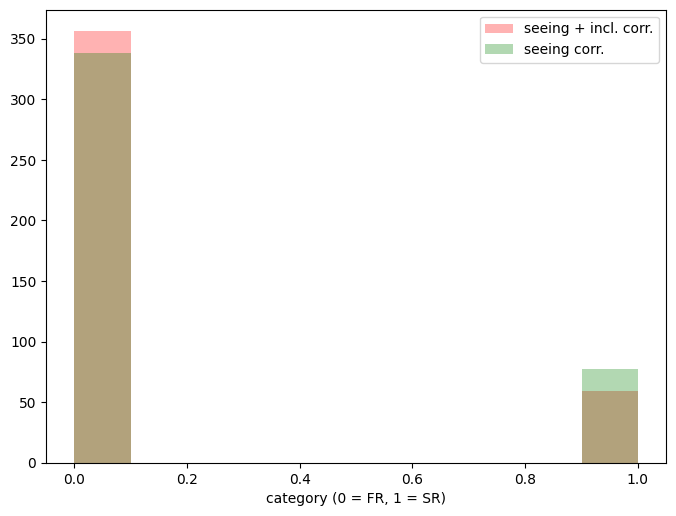

In [20]:
goodcat = []
goodcatseeing = []

for i in range(len(data)):
    if data['ROTATOR_CAT'][i] != -999:
        goodcat.append(data['ROTATOR_CAT'][i])
        goodcatseeing.append(data['ROTATOR_CAT_SEEING'][i])

# compare rotator classifications using different spins
plt.figure(figsize=(8,6),dpi=100)
plt.hist(goodcat,color='red',alpha = 0.3)
plt.hist(goodcatseeing,color='green',alpha=0.3)
plt.legend(['seeing + incl. corr.', 'seeing corr.'])
plt.xlabel('category (0 = FR, 1 = SR)')
plt.show()